In [27]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from astropy.time import Time

In [105]:
def convert_to_ap_Time(df, key):
    print(key)
    df[key] = pd.to_datetime(df[key])
    df[key] = Time([t1.astype(str) for t1 in  df[key].values], format="isot")
    return df

def convert_times_to_datetime(df):
    columns = ["Gun Time", "Chip Time", "TOD", "Beat the Bridge", "Beat the Bridge.1"]
    
    for key in columns:
        df = convert_to_ap_Time(df, key)
        df = convert_Time_to_seconds(df, key)
    return df

def convert_Time_to_seconds(df, key):
    t0 = Time("2017-05-04T00:00:00.000", format="isot")
    df["sub" + key] = df[key] - t0
    df["sub" + key] = [t.sec for t in df["sub" + key].values]
    return df

def find_astronomers(df):
    astronomers = ("Robert FIRTH", "Stephen BROWETT", "Mathew SMITH", "Sadie JONES")
    astro_df = df[df["Name"].isin((astronomers))]
    return astro_df

def plot_hist_with_astronomers(df, astro_df, key):
    rob_time = astro_df[key][158]/60.
    mat_time = astro_df[key][737]/60.
    steve_time = astro_df[key][1302]/60.
    sadie_time = astro_df[key][576]/60.

    mean_time = df[key].mean()/60
    median_time = df[key].median()/60

    plt.hist(df[key]/60., bins = 100)

    plt.plot([rob_time, rob_time], [0, 70], lw = 2, label = "Rob")
    plt.plot([mat_time, mat_time], [0, 70], lw = 2, label = "Mat")
    plt.plot([steve_time, steve_time], [0, 70], lw = 2, label = "Steve")
    plt.plot([sadie_time, sadie_time], [0, 70], lw = 2, label = "Sadie")

    plt.plot([mean_time, mean_time], [0, 70], lw = 2, color = "Black", ls = ":", label = "Mean")
    plt.plot([median_time, median_time], [0, 70], lw = 2, color = "Black", ls = "--", label = "Median")
    plt.xlabel(key.replace("sub", "") + " Minutes")

    plt.legend()

In [95]:
results_path = "/Users/berto/Code/zoidberg/ABPSoton10k/data/Results10k.csv"

df = pd.read_csv(results_path)
# df = df.drop(df.index[len(df)-10:])
df = df.drop(df.loc[df["Gun Time"] == "DNF"].index)
df = df.drop(df.loc[df["Gun Time"] == "QRY"].index)
df = df.drop(df.loc[df["Beat the Bridge"] == "99:99:99"].index)

In [96]:
df.columns

Index(['Pos', 'Bib No', 'Fav', 'Share', 'Print', 'Name', 'Gun Time',
       'Chip Time', 'Category', 'Cat Pos', 'Gender', 'Gen Pos', 'Club', 'Pace',
       'TOD', 'Beat the Bridge', 'G/Pos', 'Beat the Bridge.1', 'G/Pos.1'],
      dtype='object')

In [97]:
df = convert_times_to_datetime(df)

Gun Time
Chip Time
TOD
Beat the Bridge
Beat the Bridge.1


In [98]:
astro_df = find_astronomers(df)

In [99]:
astro_df

,Pos,Bib No,Fav,Share,Print,Name,Gun Time,Chip Time,Category,Cat Pos,...,TOD,Beat the Bridge,G/Pos,Beat the Bridge.1,G/Pos.1,subGun Time,subChip Time,subTOD,subBeat the Bridge,subBeat the Bridge.1
158,159,1662,NaN,NaN,NaN,Robert FIRTH,2017-05-04T00:48:59.600,2017-05-04T00:48:07.600,Sen,89,...,2017-05-04T11:19:05.600,2017-05-04T00:08:38.900,125,2017-05-04T00:08:38.900,125,2939.6,2887.6,40745.6,518.9,518.9
576,577,1560,NaN,NaN,NaN,Sadie JONES,2017-05-04T00:59:35.600,2017-05-04T00:55:00.400,Sen,123,...,2017-05-04T11:29:41.600,2017-05-04T00:09:27.200,80,2017-05-04T00:09:27.200,80,3575.6,3300.4,41381.6,567.2,567.2
737,738,1165,NaN,NaN,NaN,Mathew SMITH,2017-05-04T01:01:54.300,2017-05-04T00:56:49.400,Sen,276,...,2017-05-04T11:32:00.300,2017-05-04T00:09:52.100,316,2017-05-04T00:09:52.100,316,3714.3,3409.4,41520.3,592.1,592.1
1302,1303,1915,NaN,NaN,NaN,Stephen BROWETT,2017-05-04T01:14:55.000,2017-05-04T01:09:49.700,Sen,364,...,2017-05-04T11:45:01.000,2017-05-04T00:12:50.800,614,2017-05-04T00:12:50.800,614,4495.0,4189.7,42301.0,770.8,770.8


<IPython.core.display.Javascript object>


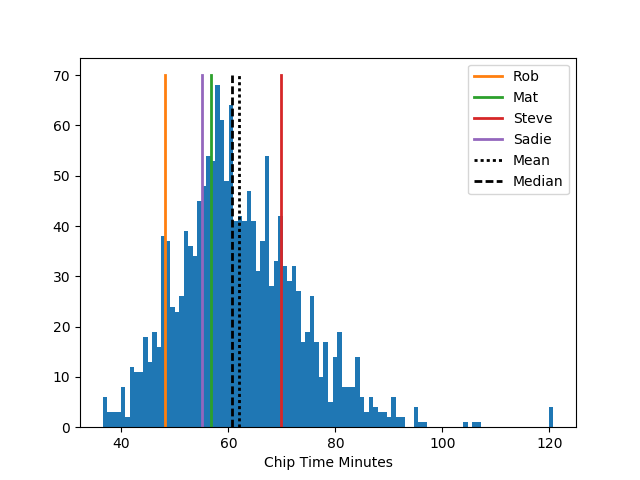

In [102]:
# key = "subGun Time"
key = "subChip Time"

rob_time = astro_df[key][158]/60.
mat_time = astro_df[key][737]/60.
steve_time = astro_df[key][1302]/60.
sadie_time = astro_df[key][576]/60.

mean_time = df[key].mean()/60
median_time = df[key].median()/60

plt.hist(df[key]/60., bins = 100)

plt.plot([rob_time, rob_time], [0, 70], lw = 2, label = "Rob")
plt.plot([mat_time, mat_time], [0, 70], lw = 2, label = "Mat")
plt.plot([steve_time, steve_time], [0, 70], lw = 2, label = "Steve")
plt.plot([sadie_time, sadie_time], [0, 70], lw = 2, label = "Sadie")


plt.plot([mean_time, mean_time], [0, 70], lw = 2, color = "Black", ls = ":", label = "Mean")
plt.plot([median_time, median_time], [0, 70], lw = 2, color = "Black", ls = "--", label = "Median")
plt.xlabel(key.replace("sub", "") + " Minutes")
plt.legend()

<IPython.core.display.Javascript object>


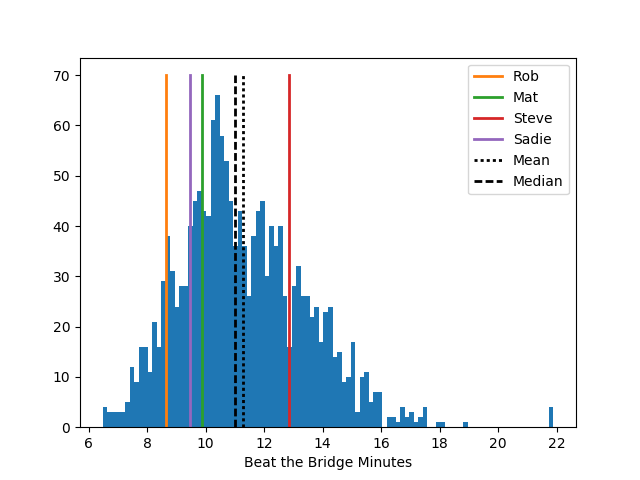

In [106]:
plot_hist_with_astronomers(df=df, astro_df=astro_df, key="subBeat the Bridge")

## Chip Time vs Bridge Time

<IPython.core.display.Javascript object>


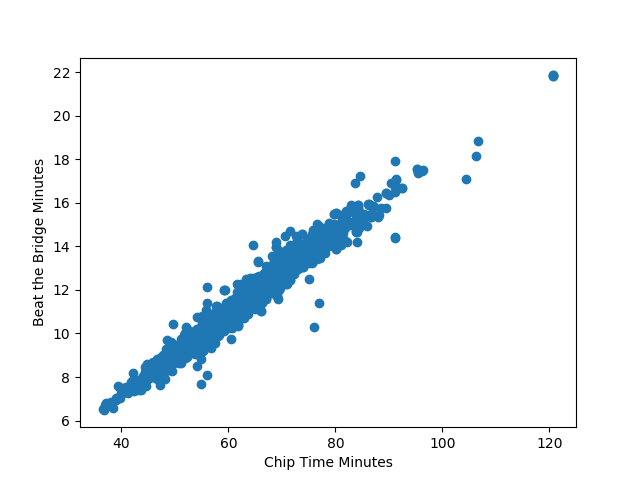

In [107]:
keyx = "subChip Time"
keyy = "subBeat the Bridge"

corr_co = np.corrcoef(df[keyx]/60., df[keyy]/60.)

plt.scatter(df[keyx]/60., df[keyy]/60.)

plt.xlabel(keyx.replace("sub", "") + " Minutes")
plt.ylabel(keyy.replace("sub", "") + " Minutes")

In [108]:
print(corr_co[1,0])

0.981240820274


## Time vs Bib Number

<IPython.core.display.Javascript object>


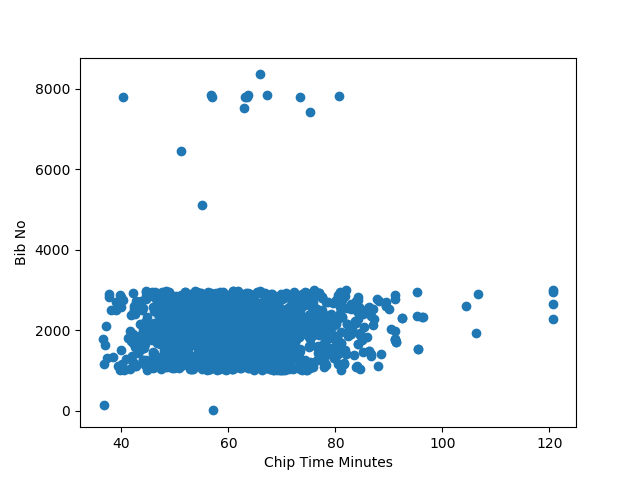

In [109]:
keyx = "subChip Time"
keyy = "Bib No"

corr_co = np.corrcoef(df[keyx]/60., df[keyy])

plt.scatter(df[keyx]/60., df[keyy])

plt.xlabel(keyx.replace("sub", "") + " Minutes")
plt.ylabel(keyy.replace("sub", ""))

In [110]:
print(corr_co[1,0])

0.0808167937219


In [38]:
# plt.scatter(df["Pos"], df["subChip Time"])
# plt.scatter(df["subChip Time"], df["subBeat the Bridge"])
plt.scatter(df["Pos"], df["G/Pos"])

In [39]:
# print(df.groupby("Gender"))
plt.scatter((df["subGun Time"] - df["subChip Time"])/60., df["subGun Time"]/60.)

In [40]:
plt.scatter(df["subChip Time"]/60., df["Bib No"])

In [41]:
df.

SyntaxError: invalid syntax (<ipython-input-41-d230d845cd15>, line 1)

In [ ]:
df.columns

In [ ]:
fig = plt.figure(figsize=[8, 4])
fig.subplots_adjust(left = 0.09, bottom = 0.13, top = 0.99,
                    right = 0.99, hspace=0, wspace = 0)

ax1 = fig.add_subplot(111)

ax1.scatter(df[df["Club"] == "NaN"]["subChip Time"]/60., df[df["Club"] == "NaN"]["subBeat the Bridge"]/60., color = "Orange")
# ax1.scatter(df[df["Club"] != "NaN"]["subChip Time"]/60., df[df["Club"] != "NaN"]["subBeat the Bridge"]/60., color = "Blue")

In [77]:
clubs = df["Club"].unique()

In [82]:
clubs = [clubs[i] for i in np.arange(len(clubs)) if i != 1]

<IPython.core.display.Javascript object>


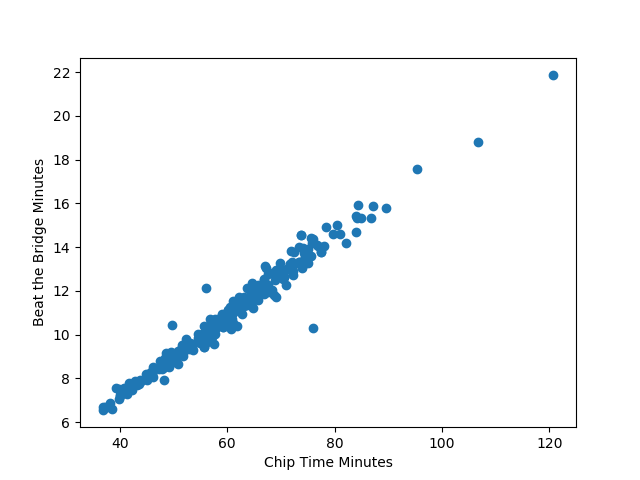

In [111]:
keyx = "subChip Time"
keyy = "subBeat the Bridge"

corr_co = np.corrcoef(df[keyx][df["Club"].isin(clubs)]/60., df[keyy][df["Club"].isin(clubs)]/60.)

plt.scatter(df[keyx][df["Club"].isin(clubs)]/60., df[keyy][df["Club"].isin(clubs)]/60.)
# plt.scatter(df[keyx][df["Club"].isin(np.invert(clubs))]/60., df[keyy][df["Club"].isin(np.invert(clubs))]/60.)

plt.xlabel(keyx.replace("sub", "") + " Minutes")
plt.ylabel(keyy.replace("sub", "") + " Minutes")


In [115]:
df[["Club", "Name", "subChip Time"]][df["Club"].isin(clubs)]

,Club,Name,subChip Time
0,ITCHEN SPITFIRES/ EALING SOUTHALL AND MIDDLESEX,James HUGHES,2205.3
3,SOUTHAMPTON AC,David BLACKMAN,2237.3
4,LORDSHILL ROADRUNNERS,David REYNOLDS,2210.4
7,EASTLEIGH RUNNING CLUB,James JOHNSON,2308.8
8,LORDSHILL ROADRUNNERS,Alan GRAHAM,2283.8
11,SOUTHAMPTON AC,Laura BRENTON,2255.1
12,RYDE HARRIERS,Cole PEARCE,2356.5
13,STUBBINGTON GREEN RUNNERS,Robert CRANSTONE,2384.0
14,SOUTHAMPTON AC,Jordan MCRITCHIE,2388.7
15,LORDSHILL ROADRUNNERS,Alice BOWLES,2395.1


In [ ]:
# convert_to_ap_Time(df)
t0 = Time("2017-04-26T00:00:00.000", format="isot")

In [ ]:
t1 = df["Gun Time"].values[0]

In [ ]:
t1

In [ ]:
t1 - t0

In [ ]:
col = df["Gun Time"] - t0

In [ ]:
x = col[0]

In [ ]:
x.

In [ ]:
col.sec